<a href="https://colab.research.google.com/github/tyukei/AI/blob/master/report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート１

#課題１ 
## scikit-learnのmake_regressionを用いて生成したデータに対して、基底関数を使うことで使わない場合に比べて線形回帰における学習データの誤差をが小さくなることを確認せよ。そして、基底関数を使った場合と使わない場合で汎化誤差にどのような違いが生じるか確かめよ。

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)とは
ランダムな回帰問題を生成するライブラリである。


まず、ライブラリーをインストールする

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.rcParams['scatter.edgecolors'] = "gray"

## make_regressionの引数について
引数を設定することで、より幅広いデータを作成することができる。

今回活用した引数をピックアップして説明を行う。

```
n_samples
```
サンプル数を指定できる。データを多くしたり、少なくしたりできる。

```
n_features
``` 
特徴量の数を指定できる。２以上のとき非線形分離となる。

```
n_informative
```
目的変数のラベルと相関が強い特徴量の数が指定できる

```
random_state
```
乱数の状態を指定できる

## make_regressionを用いてデータを作成する。

今回は、データ数が１０のとき、２０のとき、
特徴量が１のとき、２のとき、３のときでデータを作成した。

データ数はn_samplesで指定でき、特徴量はn_featuresで指定ができる。

plt.subplotsで複数のグラフを一度にまとめてやることができる。

scatterでグラフを描写する

set_titleでタイトルを設定した。


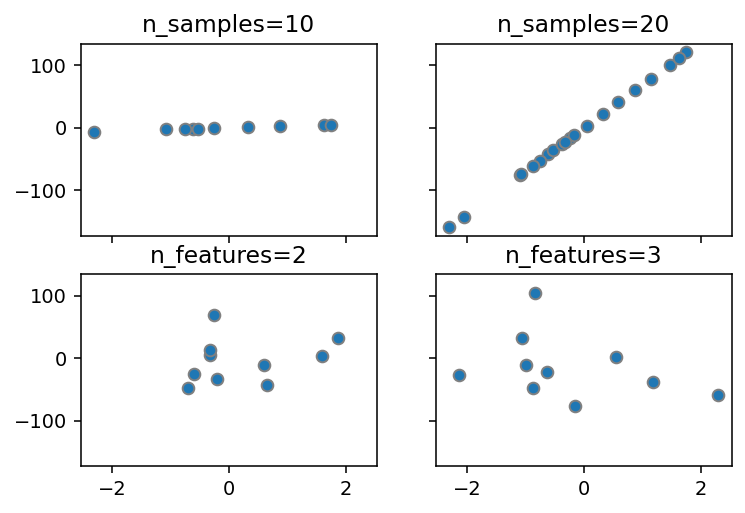

In [ ]:
# データの生成
X1,Y1 = make_regression(n_samples=10,n_features=1,n_informative=1,random_state=1)
X2,Y2 = make_regression(n_samples=20,n_features=1,n_informative=1,random_state=1)
X3,Y3 = make_regression(n_samples=10,n_features=2,n_informative=1,random_state=5)
X4,Y4 = make_regression(n_samples=10,n_features=3,n_informative=1,random_state=2)

# 複数グラフの列と行を指定
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,dpi=140) 
ax =ax.ravel()

# グラフに描写
ax[0].scatter(X1[:,0],Y1)
ax[1].scatter(X2[:,0],Y2)
ax[2].scatter(X3[:,0],Y3)
ax[3].scatter(X4[:,0],Y4)

# タイトルのセット
ax[0].set_title("n_samples=10")
ax[1].set_title("n_samples=20")
ax[2].set_title("n_features=2")
ax[3].set_title("n_features=3")

plt.show()

# 基底関数を用いないとき

## 線形回帰の実装

まず、ライブラリを用意する。

学習データと評価データに分ける用のtrain_test_split と 線形回帰用のLinearRegressionである

線形回帰を描画する関数をlinear_lineとして作成した。

引数にはデータのｘとｙとタイトルを入れる。
戻り値はないが、データの散布図とグラフの線形回帰を描画する。
以下の手順で関数を実装した。

1. まず、引数のｘをreshape(-1,1)とする。
ｘを2D配列としてmodel.fitでエラーを起こさせないためにする。

1. 次に、ホールドアウト法をtrain_test_splitを用いて分割する。学習用のｘとｙ。そして評価用のｘとｙに４分割することができる。

1. 線形回帰のモデルをLinearRegressionを用いて実装を行う。

1. 全処理したデータをmode.fitで学習の実装を行う

1. モデルに対してmodel.predictで予測を実装する

1. 係数をcoef_で算出する

1. 切片をintercept_で算出する

1. グラフに算出する


In [ ]:
# ライブラリを用意
from sklearn.model_selection import train_test_split # 学習データと評価データに分ける
from sklearn.linear_model import LinearRegression #  線形回帰
from sklearn.metrics import mean_absolute_error # 平均絶対誤差(MAE: Mean Absolute Error)

In [ ]:
def linear_line(X,y,title):
  x = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=2) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(mab) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("mae(test data): ",msb1)
  print("mae(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A*xp+B # 回帰直線
  plt.scatter(train_x,train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x,test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

緑の線が学習データから学習した回帰直線である

青が学習データ

赤がテストデータである

mae(test data):  0.0
mae(train data):  0.0


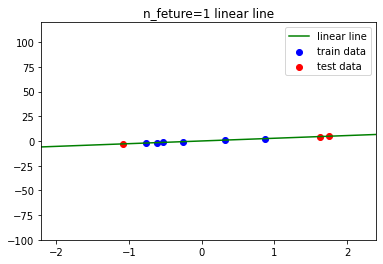

In [ ]:
linear_line(X1,Y1,"n_feture=1 linear line")

グラフからデータと回帰直線はほぼ誤差がないように見える。

これを定量的に評価するため、
MAE(平均絶対誤差)を用いる。

MAEは実際の値と予測値の絶対値を平均したものである。

MAEが大きいと誤差が大きく予測が正確にできていないことが示され、
逆に小さいと正確に予測ができていることを示す。

今回はデータが直線上であったこともあり、MAEは０で正確に予測できていた。

mae(test data):  39.04273817631884
mae(train data):  20.242601341473694


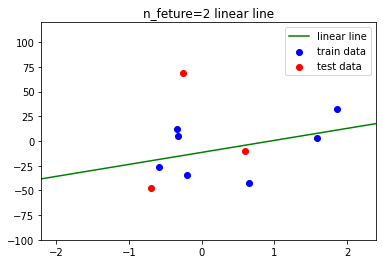

In [ ]:
linear_line(X3[:,0],Y3,"n_feture=2 linear line")

n_feture=2のとき、データが直線上にないため、
すべてを正確には予測できていない。

ただ、右肩上がりとなっており、データの傾向はつかめているように見える。

mae(test data):  38.302728378081774
mae(train data):  35.515503771636624


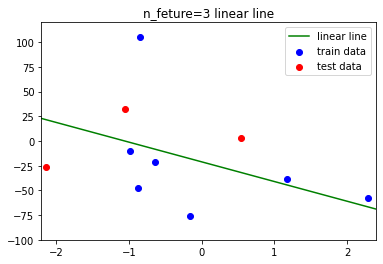

In [ ]:
linear_line(X4[:,0],Y4,"n_feture=3 linear line")

n_feture=３のとき、データが直線上にないため、
すべてを正確には予測できていない。

ただ、右肩下がりとなっており、データの傾向はつかめているように見える。

# 基底関数を用いたとき

## 2次多項式回帰の実装

回帰直線と同様の流れで実装を行う。

引数にデータのｘとｙとタイトルをとり、
戻り値はないが、グラフを描画する関数を作成する

ただ、変更点として、以下の点がある。
- 多項式回帰用にPolynomialFeaturersを新たに加える。

- PolynomialFeaturesで2次元の特徴量に変化を行う。

- 多項回帰線は係数Aが２つになり$z = A_1x + A_2x^2 +B $
となる


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def polinomial2(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 2) # 2次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("mae(test data): ",msb1)
  print("mae(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+B # 多項式回帰
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="polynomial 2 degree") 
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

mae(test data):  2.4424906541753444e-15
mae(train data):  2.9341608507950564e-15


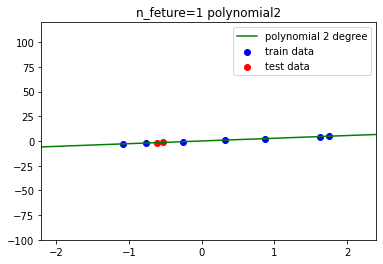

In [ ]:
polinomial2(X1,Y1,"n_feture=1 polynomial2")

ほとんどデータと多項回帰線は同じように見える。

しかしmabを見ると誤差があることがわかる。

直線上にあるデータを無理に２次回帰線にすると返ってデータの正確率が下がることがわかる。

mae(test data):  17.25785898048238
mae(train data):  31.018360442892707


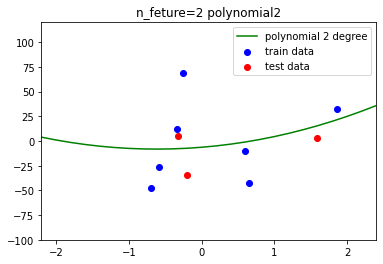

In [ ]:
polinomial2(X3[:,0],Y3,"n_feture=2 polynomial2")

2次回帰線線にすることで、テストデータとの誤差が39から17と精度が上がったことがわかる。

一方学習データは20から31と誤差が増えた結果となった。

x軸の-1から0の範囲でyが-50から75まで幅広くあり、そこを２次曲線でうまく表せられていないためだとみてとれる。


mae(test data):  62.12877588576273
mae(train data):  17.724009683000453


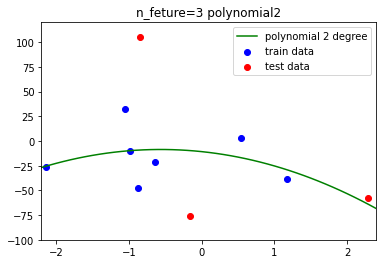

In [ ]:
polinomial2(X4[:,0],Y4,"n_feture=3 polynomial2")

n_feature=3ではn_feature=2とことなり、
学習データの誤差が下がり、テストデータの誤差が増加した結果となった。

x軸の-1付近でyが-50から100の値をとっており、
100の値がテストデータであったためテストデータの誤差が増加したと考えられる。

# 3次多項式回帰の実装
2次多項式回帰の実装とほぼ同じ関数を用いた。

PolynomialFeaturesのdegreeを３として３次元の特徴量に変換を行った。

多項回帰線は係数Aが3つになり$z = A_1x + A_2x^2 + A_3x^3+B $
となる

In [ ]:
def polinomial3(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 3) # 3次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("mae(test data): ",msb1)
  print("mae(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+B
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

mae(test data):  4.440892098500626e-16
mae(train data):  1.09436269570194e-15


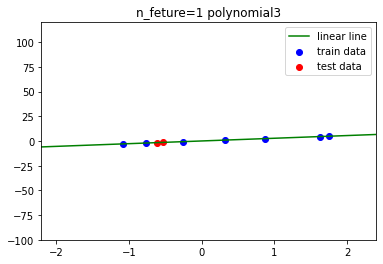

In [ ]:
polinomial3(X1,Y1,"n_feture=1 polynomial3")

2次多項式回帰に比べ、
評価データは性能が上がり、
学習データでは性能が下がった。

誤差は若干であり視覚的にはほぼ、線上にあるように見える。

mae(test data):  55.90961258774289
mae(train data):  13.151187269523026


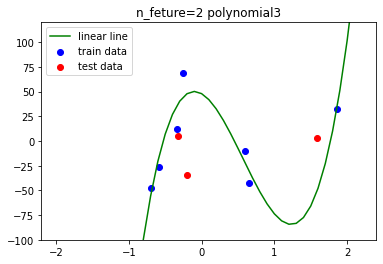

In [ ]:
polinomial3(X3[:,0],Y3,"n_feture=2 polynomial3")


学習データは2次多項式回帰のときの
誤差が31から13と減り、精度が上がったことがわかる。

一方で評価データの誤差は増加し、精度は下がった。

視覚的には、学習データ(青い点)の特徴を結んでいて
精度が良くなっていることが見て分かる。

一方で評価データ(赤い点)は無視されていることも見て分かる。

mae(test data):  89.76578649926893
mae(train data):  17.041998527458126


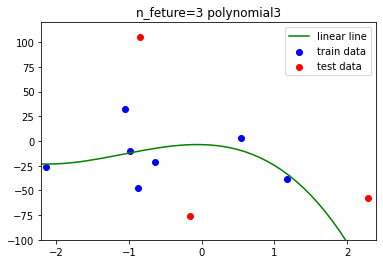

In [ ]:
polinomial3(X4[:,0],Y4,"n_feture=3 polynomial3")

2次多項式回帰に比べ、
学習データの誤差は17から17とほとんど同じ結果となった。

一方で評価データは62から89とさらに増加している。

2次のときはx軸が-1から-2付近で偶然テストデータ付近を通ってたのに対し、
3次にときは学習データにより合わせた形となり、テストデータから離れてしまったと考えられる。

## 5次多項式回帰の実装
2次,3次多項式回帰の実装とほぼ同じ関数を用いた。

PolynomialFeaturesのdegreeを5として5次元の特徴量に変換を行った。

多項回帰線は係数Aが3つになり$z = A_1x + A_2x^2 + A_3x^3+A_4x^4+A_5x^5+ B $
となる

In [ ]:
def polinomial5(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 5) # 5次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("mae(test data): ",msb1)
  print("mae(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+A[4]*xp**4+A[5]*xp**5+B
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

mae(test data):  2.2485716992074836e-13
mae(train data):  4.773959005888173e-15


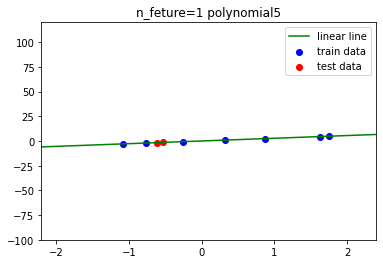

In [ ]:
polinomial5(X1,Y1,"n_feture=1 polynomial5")

3次多項式回帰に比べると評価データの誤差は４から２となり若干減少した。
学習データは１から４になり若干増加した。

誤差は若干であり視覚的にはほぼ、線上にあるように見える。

mae(test data):  362.13483276141204
mae(train data):  6.845575822215608


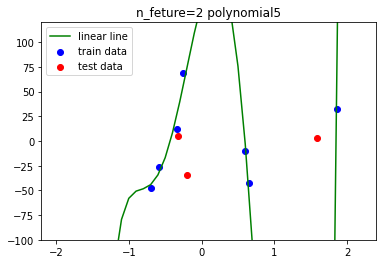

In [ ]:
polinomial5(X3[:,0],Y3,"n_feture=2 polynomial5")

評価データ(赤い点)は無視してほぼ学習データ(青い点)を網羅した５次回帰線になっていることがわかる。

実際評価データの誤差は362と大きな値をとったが、
学習データの誤差は6と小さな値をとった。

mae(test data):  9518.002621830992
mae(train data):  0.08816948044090811


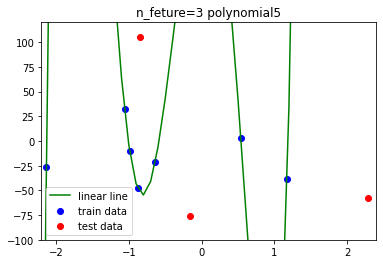

In [ ]:
polinomial5(X4[:,0],Y4,"n_feture=3 polynomial5")

n_feature=2だけでなく、n_feature=3も同様に、
学習データに対しては誤差は小さく、
評価データに対しては誤差が大きくなるような
回帰線を示した。

## まとめ
以上の結果より以下のことがわかった。

1. 基底関数を用いることで、学習データの誤差が視覚的にも、定量的にも小さくなったことがわかった。特に、データが直線上になく散らばっている場合、多項式回帰の次元が大きい場合、特に誤差が小さくなったことが確かめられた。

1. 一方で、未知のデータ（今回では評価データ)への誤差は基底関数の高次元を用いることで、大きくなることがわかった。学習データに対して過度に対応してしまい、汎用性が失われたためだと考えられる。

1. すべてのデータを１次線形回帰直線で予測することはできない。かといって、汎用性のないような多項回帰線を用いることもできない。今回であれば、n_feature=2は５次元までとらなくても３次元ですでに大枠の多項回帰線を生成できていたように、適切な次元を調節して回帰線を生成する必要がある。

# 課題2
モデル木をPythonで実装し、scikit-learn付属のデータで動作確認をせよ。scikit-learnで実装済みのメソッドを用いて可能な限り簡潔なコードとすること。エラー処理などは最低限度でよい。

まず、必要なライブラリーを用意する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#　機械学習モデル
from sklearn.model_selection import train_test_split # 学習データと評価データに分割する
from sklearn.tree import DecisionTreeRegressor, plot_tree # モデル木生成

#sklean cancer dataの読み込み
from sklearn.datasets import load_breast_cancer

今回は、乳がんのデータセットである、breast cancerを用いて学習をおこなった。

breast.DESCRで説明が見れる。

In [ ]:
breast = load_breast_cancer()
X = breast.data
y = breast.target
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

特徴量は３０個ある
1. mean radius 平均半径
2. mean texture テクスチャをグレースケールにした際の平均
3. mean perimeter 平均外周の長さ
4. mean area 平均面積
5. mean smoothness 平均なめらかさ（半径の分散）
6. mean compactness 外周長さ^2 / 面積 - 1.0で示すコンパクトさ平均
7. mean concavity 輪郭の凹部の重要度の平均
8. mean concave points 輪郭の凹部の数の平均
9. mean symmetry 対称性
10. mean fractal dimension フラクタル次元の平均
11. radius error 半径誤差
12. texture error テクスチャの誤差
13. perimeter error 外周の誤差
14. area error 面積の誤差
15. smoothness error なめらかさの誤差
16. compactness error コンパクトさの誤差
17. concavity error 輪郭の凹部の重要度の誤差
18. concave points error 輪郭の凹部の数の誤差
19. symmetry error 対称性の誤差
20. fractal dimension error フラクタル次元の誤差
21. worst radius 半径最悪値
22. worst texture テクスチャ最悪値
23. worst perimeter 外周の長さ最悪値
24. worst area 面積の最悪値
25. worst smoothness なめらかさの最悪値
26. worst compactness コンパクトさの最悪値
27. worst concavity 輪郭の凹部の重要度の最悪値
28. worst concave points 輪郭の凹部の数の最悪値
29. worst symmetry 対称性の最悪値
30. worst fractal dimension フラクタル次元の最悪値

np.set_printoptions(suppress=True) として、ndarrayのデータを表示させたときに指数表示を行わないようにしてから、学習データXの冒頭5件ほどの内容を確認する。

学習データを確認することも大切である。

In [ ]:
np.set_printoptions(suppress=True)  
X[0:5]

array([[  17.99    ,   10.38    ,  122.8     , 1001.      ,    0.1184  ,
           0.2776  ,    0.3001  ,    0.1471  ,    0.2419  ,    0.07871 ,
           1.095   ,    0.9053  ,    8.589   ,  153.4     ,    0.006399,
           0.04904 ,    0.05373 ,    0.01587 ,    0.03003 ,    0.006193,
          25.38    ,   17.33    ,  184.6     , 2019.      ,    0.1622  ,
           0.6656  ,    0.7119  ,    0.2654  ,    0.4601  ,    0.1189  ],
       [  20.57    ,   17.77    ,  132.9     , 1326.      ,    0.08474 ,
           0.07864 ,    0.0869  ,    0.07017 ,    0.1812  ,    0.05667 ,
           0.5435  ,    0.7339  ,    3.398   ,   74.08    ,    0.005225,
           0.01308 ,    0.0186  ,    0.0134  ,    0.01389 ,    0.003532,
          24.99    ,   23.41    ,  158.8     , 1956.      ,    0.1238  ,
           0.1866  ,    0.2416  ,    0.186   ,    0.275   ,    0.08902 ],
       [  19.69    ,   21.25    ,  130.      , 1203.      ,    0.1096  ,
           0.1599  ,    0.1974  ,    0.1279  ,   

回帰木の作成する。

深さはmax_depthで決定できる。

今回は深さを3とする。

In [ ]:
rt = DecisionTreeRegressor(max_depth = 1) # モデル木の実装
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
rt.fit(train_x, train_y) # 学習の実装

DecisionTreeRegressor(max_depth=1)

木の表示を行う.

plot.figureで画像サイズを指定する。

plot_treeで、モデル木の描写を行う。
- filledではノードの濃さを出すが指定
- feature_namesでは特徴量の名前を指定
- fontsizeではフォントのサイズを指定

ノードの濃さはvalueの大きさを表す。

今回であれば、乳がんである確率が高いほど、
色が濃くなっている。

ちなみに、左下に伸びる方がtrueとなり、右下に伸びる方がfalseとなる。

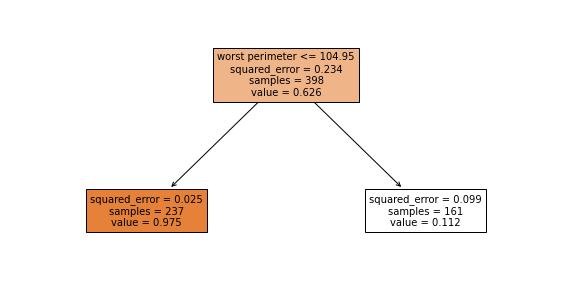

In [ ]:
plt.figure(figsize=(10,5)) # 画像サイズ 
plot_tree(rt, filled=True, feature_names=breast.feature_names, fontsize=10)
plt.show()


ここから外周の最悪値(worst perimeter)が104.95より小さいと、
乳がんである確率が高くなり、小さくないときは乳がんである確率が低くなるという結果が得られたことがわかる。

次にこのモデル木がどのくらい精度が高いか、
scoreを用いて、正答率を算出する

In [ ]:
rt.score(test_x,test_y)

0.44944324523634904

正答率は0.44となり半分以下であった。
次に最大深度を２にしてみる

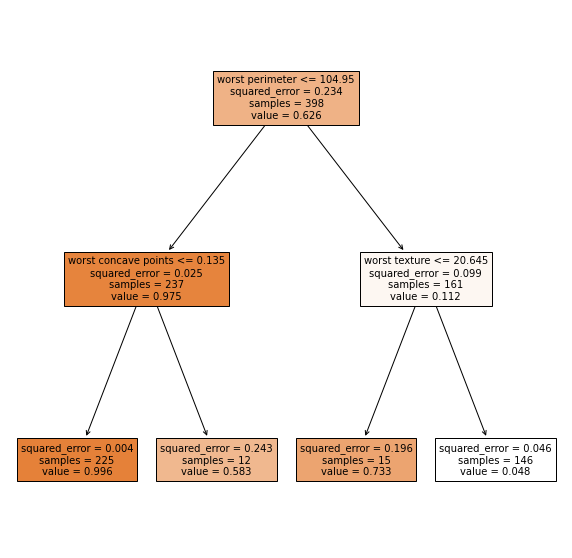

0.57288626639172

In [ ]:
rt = DecisionTreeRegressor(max_depth = 2) # モデル木の実装
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
rt.fit(train_x, train_y) # 学習の実装
plt.figure(figsize=(10,10)) # 画像サイズ 
plot_tree(rt, filled=True, feature_names=breast.feature_names, fontsize=10)
plt.show()
rt.score(test_x,test_y)

正答率は0.57と少し上昇した。

次に最大深度を3,4,5としてみる

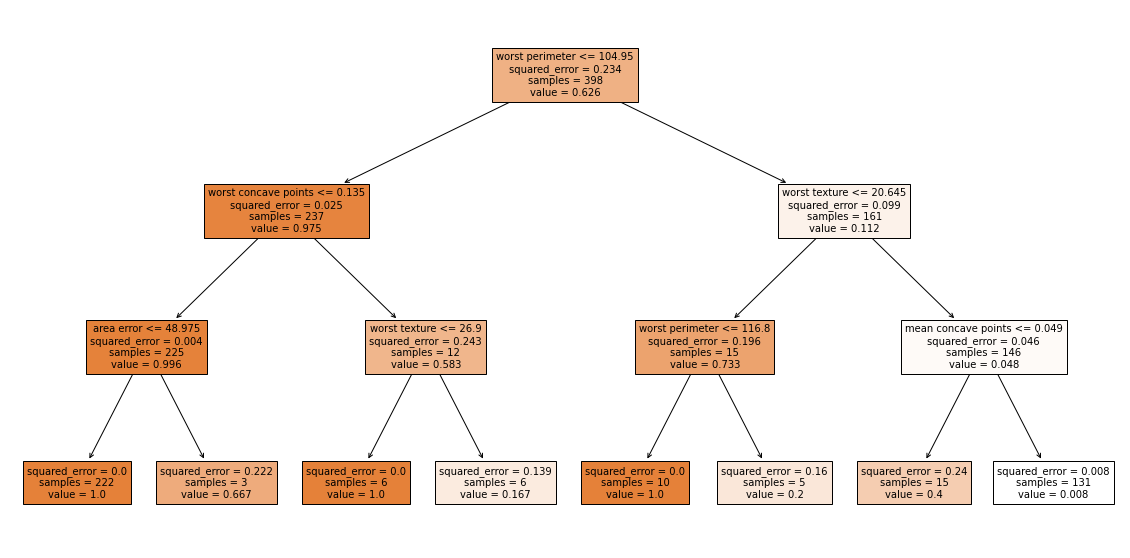

0.7624884825254041

In [ ]:
rt = DecisionTreeRegressor(max_depth = 3,random_state=1) # モデル木の実装
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
rt.fit(train_x, train_y) # 学習の実装
plt.figure(figsize=(20,10)) # 画像サイズ 
plot_tree(rt, filled=True, feature_names=breast.feature_names, fontsize=10)
plt.show()
rt.score(test_x,test_y)

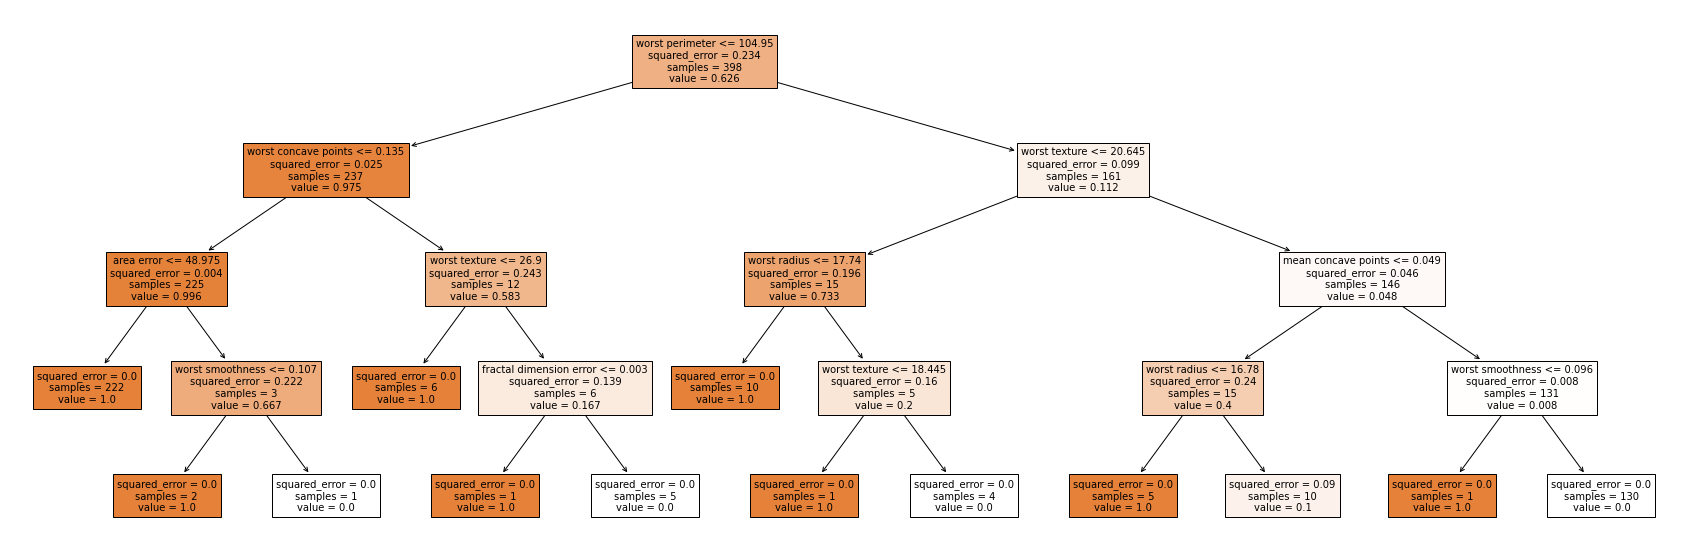

0.7024338624338624

In [ ]:
rt = DecisionTreeRegressor(max_depth = 4,random_state=1) # モデル木の実装
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
rt.fit(train_x, train_y) # 学習の実装
plt.figure(figsize=(30,10)) # 画像サイズ 
plot_tree(rt, filled=True, feature_names=breast.feature_names, fontsize=10)
plt.show()
rt.score(test_x,test_y)

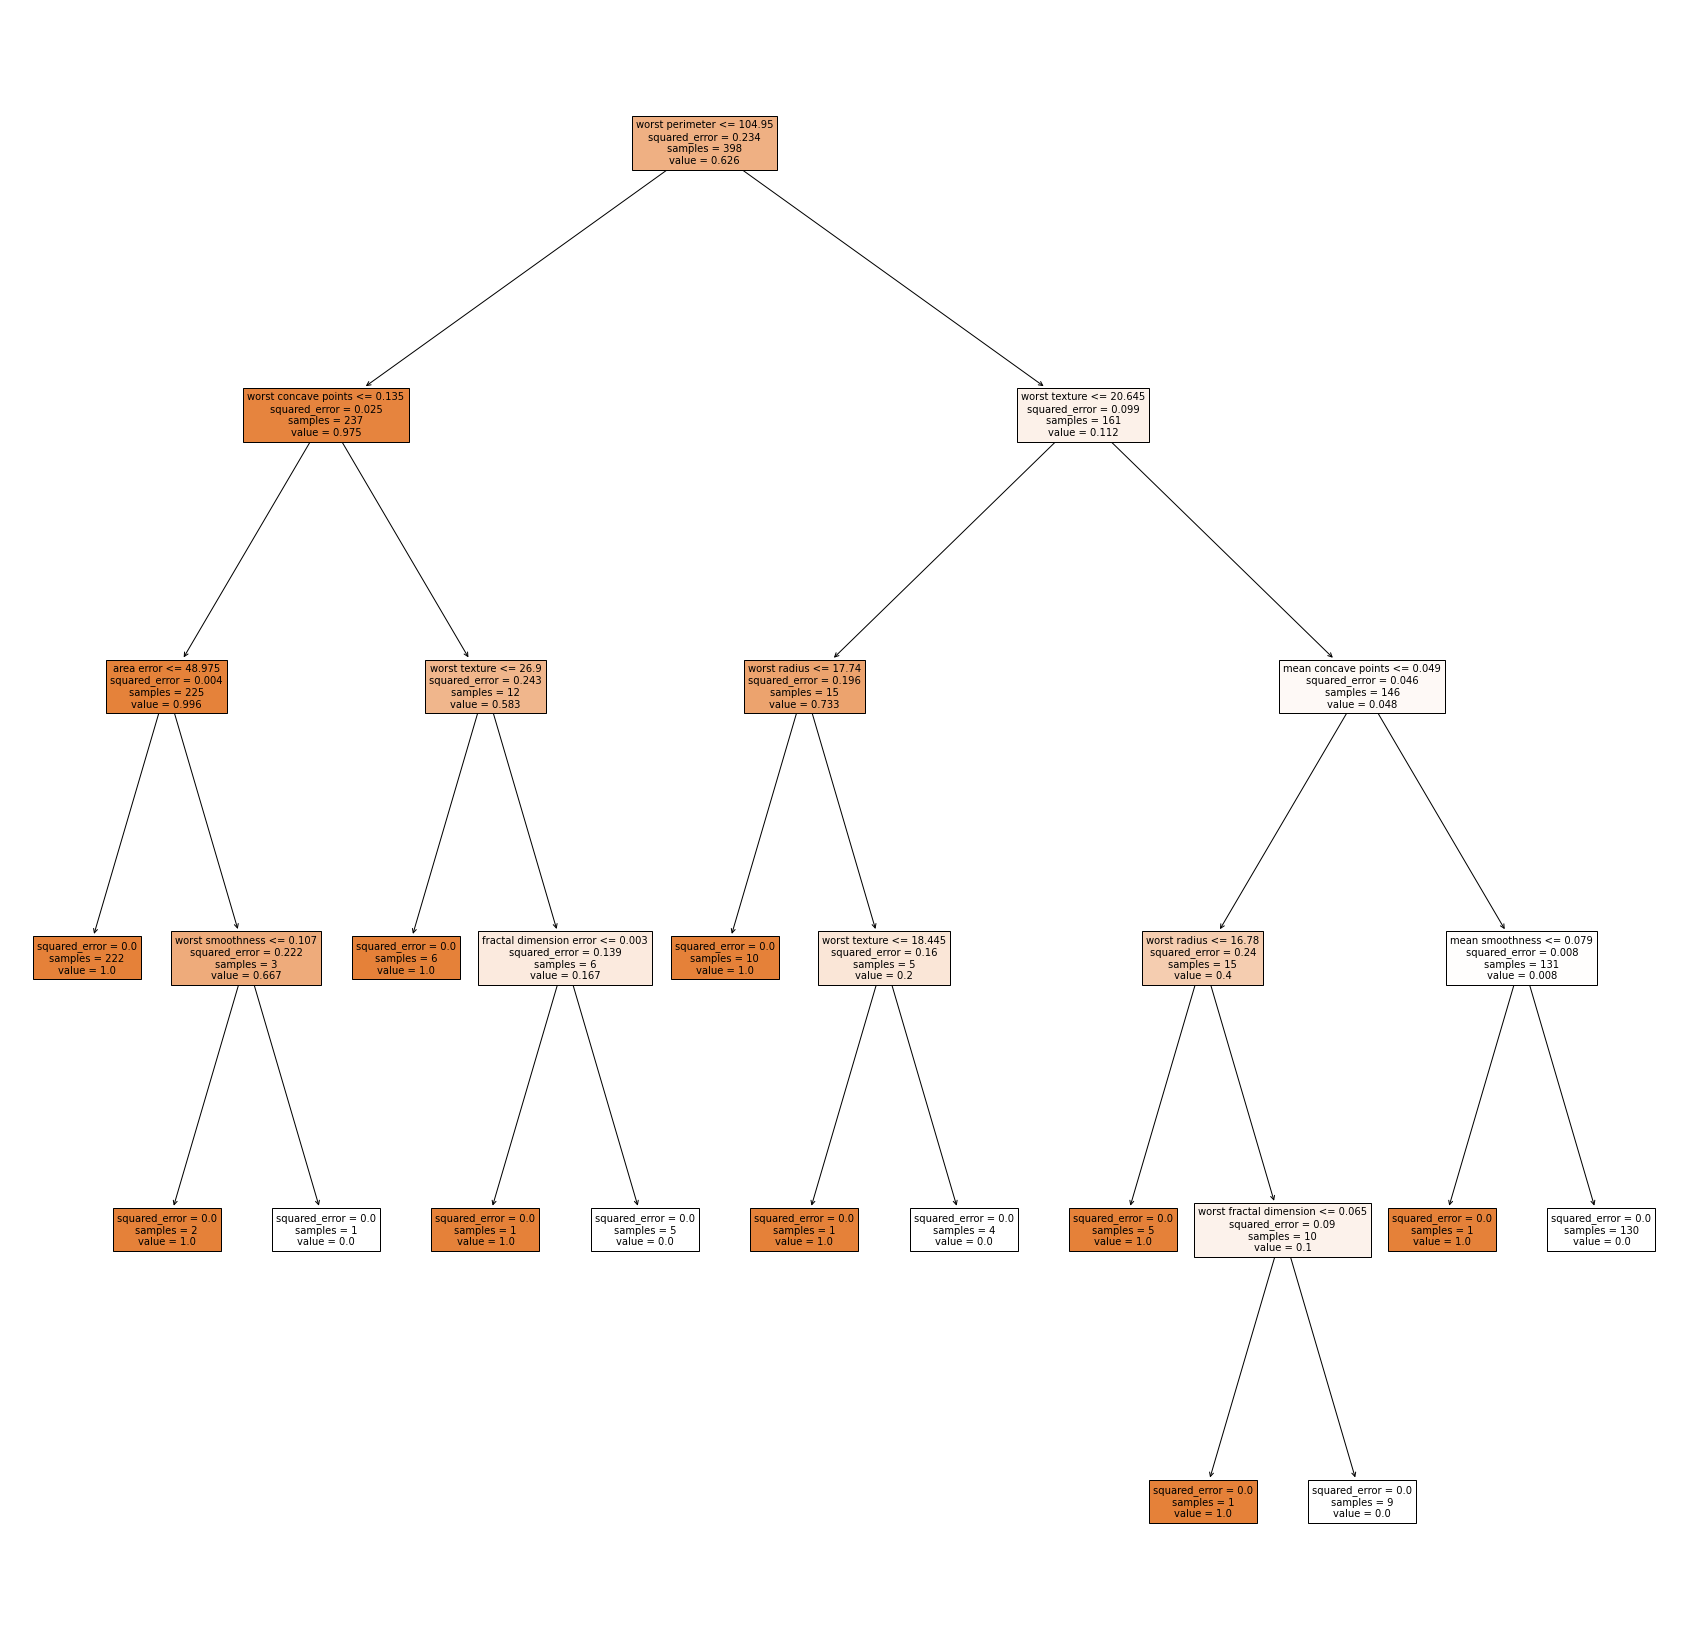

0.6984126984126984

In [ ]:
rt = DecisionTreeRegressor(max_depth = 5,random_state=1) # モデル木の実装
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
rt.fit(train_x, train_y) # 学習の実装
plt.figure(figsize=(30,30)) # 画像サイズ 
plot_tree(rt, filled=True, feature_names=breast.feature_names, fontsize=10)
plt.show()
rt.score(test_x,test_y)

結果、最大深度を上げると、正答率は0.76, 0.70, 0.69と若干減少した。

random_stateによって正答率の大小は変わったりしたものの、
最大深度を上げたからと言って正答率が必ず上がるということにはならなかった。

また、最大深度を上げることで、分岐が複雑になり、見にくくなったことがわかる。



# まとめ
- DecisionTreeRegressorを用いて、回帰木分岐図を生成できる
- plot_treeを用いて回帰木分岐図を描写できる
- 回帰木分岐図を使うと、視覚的に結果が見やすい(ただし、最大深度が１や２のとき)
- 最大深度を上げると正答率は上がったが、上げすぎると、正答率は横ばいとなり精度は上がらず、また複雑で見にくい回帰木分岐図となった。
- 正答率は最大でも0.8以下であり、そこまでいい精度ではなかった。